# Regression Example

You'll need to modify the ``DATA_HOME`` variable to the location of the datasets.

In this tutorial we'll use the the colors of 400,000+ galaxies from the Sloan Digital Sky Survey. 

The data was downloaded with the script fetch_data.py. This script also includes a python implementation of the SQL query used to construct this data. This template can be modified to download more features if desired. 

In [ ]:
import os
DATA_HOME = os.path.abspath('C:/temp/AstroML/data/sdss_photoz/')

First we will load this data, shuffle it in preparation for later, and arrange the colors in an array of shape (n_samples, n_features):

In [ ]:
import numpy as np
data = np.load(os.path.join(DATA_HOME,'sdss_photoz.npy'))

The data is in a record array, as in the classification example

In [ ]:
print(data.dtype.names)

Now we'll set up our data matrix ``X`` and redshift ``z``

In [43]:
N = len(data)
X = np.zeros((N, 4), dtype=np.float32)
X[:, 0] = data['u'] - data['g']
X[:, 1] = data['g'] - data['r']
X[:, 2] = data['r'] - data['i']
X[:, 3] = data['i'] - data['z']
z = data['redshift']
X = np.nan_to_num(X)

Next we’ll split the data into two samples: a training sample and a test sample which we’ll use to evaluate our training:

In [44]:
Ntrain = 3 * N / 4
Xtrain = X[:Ntrain]
ztrain = z[:Ntrain]
Xtest = X[Ntrain:]
ztest = z[Ntrain:]

Now we’ll use the scikit-learn ``DecisionTreeRegressor`` method
to train a model and predict redshifts for the test set based
on a 20-level decision tree:

In [45]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor(max_depth=20)
clf.fit(Xtrain, ztrain)
zpred = clf.predict(Xtest)

To judge the efficacy of prediction, we can compute the
root-mean-square (RMS) difference between the true and predicted values:

In [46]:
rms = np.sqrt(np.mean((ztest - zpred) ** 2))
print rms

nan


Our RMS error is about 0.22. This is pretty good for such an unsophisticated
learning algorithm, but better algorithms can improve on this. The biggest
issue here are the catastrophic errors, where the predicted redshift is
extremely far from the prediction:

In [47]:
print "Number of test samples:       ", len(ztest)
print "Number of catastrophic errors:", np.sum(abs(ztest - zpred) > 1)

Number of test samples:        102798
Number of catastrophic errors: 0


About 1.5% of objects have redshift estimates which are off by greater than 1.
This sort of error in redshift determination is very problematic for
high-precision cosmological studies. This can be seen in a scatter plot of
the predicted redshift versus the true redshift for the test data:

In [50]:
%matplotlib inline
import matplotlib.pyplot as pl

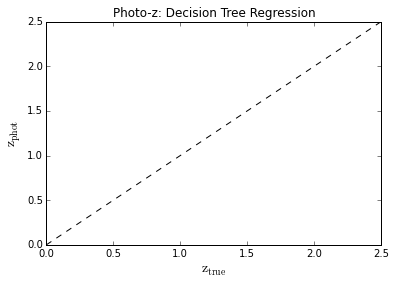

In [51]:
ax = pl.axes()

pl.scatter(ztest, zpred, c='k', lw=0, s=4)
axis_lim = np.array([0, 2.5])

# plot the true redshift
pl.plot(axis_lim, axis_lim, '--k')

# plot +/- the rms
pl.plot(axis_lim, axis_lim + rms, '--r')  
pl.plot(axis_lim, axis_lim - rms, '--r')
pl.xlim(axis_lim)
pl.ylim(axis_lim)

pl.title('Photo-z: Decision Tree Regression')
pl.xlabel(r'$\mathrm{z_{true}}$', fontsize=14)
pl.ylabel(r'$\mathrm{z_{phot}}$', fontsize=14)

The true and predicted redshifts of 102,798 SDSS galaxies, using a simple decision tree regressor. Notice the presece of catastrophic outliers: those galaxies whose predicted redshifts are extremely far from the true value.

Later, in Exercise #2, we will attempt to improve on this by optimizing the parameters of the decision tree.

In practice, the solutions to the photometric redshift problem can benefit from approaches that use physical intuition as well as machine learning tools. For example, some solutions involve the use of libraries of synthetic galaxy spectra which are known to be representative of the true galaxy distribution. This extra information can be used either directly, in a physically motivated analysis, or can be used to generate a larger suite of artificial training instances for a pure machine learning approach.